# Spectra analysis 

Based on code by Xinyue Shen & Matt Nicholl.

This file is for analysing the spectra downloaded from TNS database.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Class distribution
For each class, how many objects reside?

For each object, how many spectra gained?

In [8]:
spectra_info = df = pd.read_csv(
    "../1. download ALL wise data/wiserep_spectra_combined.csv"
)  # .set_index(' IAU name').to_dict('index')
spectra_info.head()

/var/folders/2d/ht34x6mn7hx9d1sv4g_j8nfr0000gn/T/ipykernel_73699/3822713843.py:1: DtypeWarning: Columns (0,33) have mixed types. Specify dtype option on import or set low_memory=False.
  spectra_info = df = pd.read_csv(


,IAU name,Internal name/s,Obj. RA,Obj. DEC,Obj. Type,Redshift,Spec. ID,Obs-date,JD,Phase (days),...,Grating,Blaze,Lambda-min,Lambda-max,Del-Lambda,Contrib,Publish,Remarks,Created by,Creation date
0,SN 1999gi,NaN,154.56942,41.44117,SN IIP,0.001961,10912,2000-03-15 00:00:00.00,2451618.5,NaN,...,NaN,NaN,3300.0,5399.0,0.999524,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18
1,SN 1999gi,NaN,154.56942,41.44117,SN IIP,0.001961,10913,2000-03-15 00:00:00.00,2451618.5,NaN,...,NaN,NaN,5100.0,10499.0,0.999815,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18
2,SN 1999gi,NaN,154.56942,41.44117,SN IIP,0.001961,10932,2000-03-15 00:00:00.00,2451618.5,NaN,...,NaN,NaN,3300.0,10500.0,1.999445,Shivvers et al. 2017,2017PASP..129e4201S,"[Data obtained from:Shivvers, I.] [Prev. spec ...",Migration From WISeREP1.0,2011-07-21 07:54:18
3,SN 1999gi,NaN,154.56942,41.44117,SN IIP,0.001961,49488,2000-03-15 00:00:00.00,2451618.5,NaN,...,NaN,NaN,3300.0,10500.0,1.999445,NaN,2002AJ....124.2490L,SNR: 22.188;,WIS_Bot1,2019-01-23 10:48:35
4,SN 1999gi,NaN,154.56942,41.44117,SN IIP,0.001961,10914,2000-03-25 00:00:00.00,2451628.5,NaN,...,NaN,NaN,4380.0,6839.0,0.999593,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18


Replace some column names and value types. 

In [10]:
old_names = spectra_info.columns.to_list()
name_dict = {}
for i in old_names:
    name_dict[i] = (
        i.strip()
        .replace(". ", "_")
        .replace("/", "")
        .replace(" ", "_")
        .replace("-", "_")
    )
spectra_info = spectra_info.rename(columns=name_dict)

df_obj = spectra_info.select_dtypes("object")
spectra_info[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
spectra_info[
    [
        "Redshift",
        "JD",
        "Obj_RA",
        "Obj_DEC",
        #   "Obj_ID"
    ]
] = spectra_info[
    [
        "Redshift",
        "JD",
        "Obj_RA",
        "Obj_DEC",
        #  "Obj_ID"
    ]
].apply(
    pd.to_numeric, errors="coerce"
)
spectra_info

,IAU_name,Internal_names,Obj_RA,Obj_DEC,Obj_Type,Redshift,Spec_ID,Obs_date,JD,Phase_(days),...,Grating,Blaze,Lambda_min,Lambda_max,Del_Lambda,Contrib,Publish,Remarks,Created_by,Creation_date
0,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10912,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,NaN,3300.000000,5399.000000,0.999524,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18
1,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10913,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,NaN,5100.000000,10499.000000,0.999815,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18
2,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10932,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,NaN,3300.000000,10500.000000,1.999445,Shivvers et al. 2017,2017PASP..129e4201S,"[Data obtained from:Shivvers, I.] [Prev. spec ...",Migration From WISeREP1.0,2011-07-21 07:54:18
3,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,49488,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,NaN,3300.000000,10500.000000,1.999445,NaN,2002AJ....124.2490L,SNR: 22.188;,WIS_Bot1,2019-01-23 10:48:35
4,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10914,2000-03-25 00:00:00.00,2.451628e+06,NaN,...,NaN,NaN,4380.000000,6839.000000,0.999593,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54000,NaN,ZTF21aceuvhb,15.794479,3.07434,M dwarf,NaN,63947,2021-10-14 02:06:50.00,2.459502e+06,NaN,...,Free,NaN,3651.048340,9246.227457,5.512492,NaN,NaN,NaN,WIS_Bot1,2021-10-14 11:33:34
54001,NaN,ZTF22abgucbp,57.463603,-7.37529,AGN,0.382000,67804,2022-10-14 08:07:14.00,2.459867e+06,NaN,...,Free,NaN,3673.047852,9268.227452,5.512492,NaN,NaN,NaN,WIS_Bot1,2022-10-14 11:26:57
54002,NaN,ZTF20abodaps,359.810211,-17.69645,AGN,0.610000,78514,2023-10-04 06:26:57.00,2.460222e+06,NaN,...,Free,NaN,3671.381836,9267.085081,5.513008,NaN,NaN,NaN,WIS_Bot1,2023-10-04 13:16:26
54003,NaN,N0E8005418,315.551786,0.21671,Galaxy,0.191000,78971,2023-11-05 00:50:44.00,2.460254e+06,NaN,...,Free,NaN,3672.381836,9268.085081,5.513008,NaN,NaN,NaN,WIS_Bot1,2023-11-05 13:01:33


In [11]:
spectra_info = spectra_info[~(spectra_info.Obj_Type == "Computed-Ia")]
iau_names = list(set(spectra_info["IAU_name"].tolist()))
print("There are %i events in total.\n " % len(iau_names))

There are 24745 events in total.
 


How many samples have multiple spectra?

In [12]:
spec_num_df = (
    spectra_info.groupby("IAU_name")
    .size()
    .sort_values(ascending=False)
    .to_frame(name="spec_count")
)

# Filter to keep only rows where the size is 2 or more
spec_num_df = spec_num_df[spec_num_df["spec_count"] >= 2]

spec_num_df

,spec_count
IAU_name,
SN 2009ip,322
SN 2012fr,227
SN 2011fe,187
SN 2013ej,184
SN 1993J,176
...,...
SN 2002bp,2
SN 2024mxq,2
SN 1997dc,2


Text(0.5, 0, 'Num of spectra')

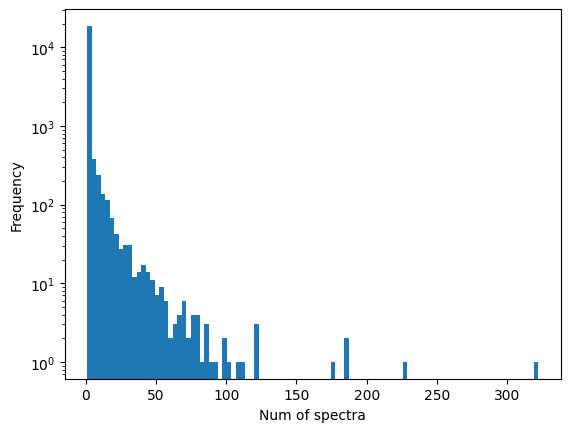

In [13]:
spectra_info.groupby("IAU_name").size().plot.hist(bins=100)
plt.yscale("log")
plt.xlabel("Num of spectra")

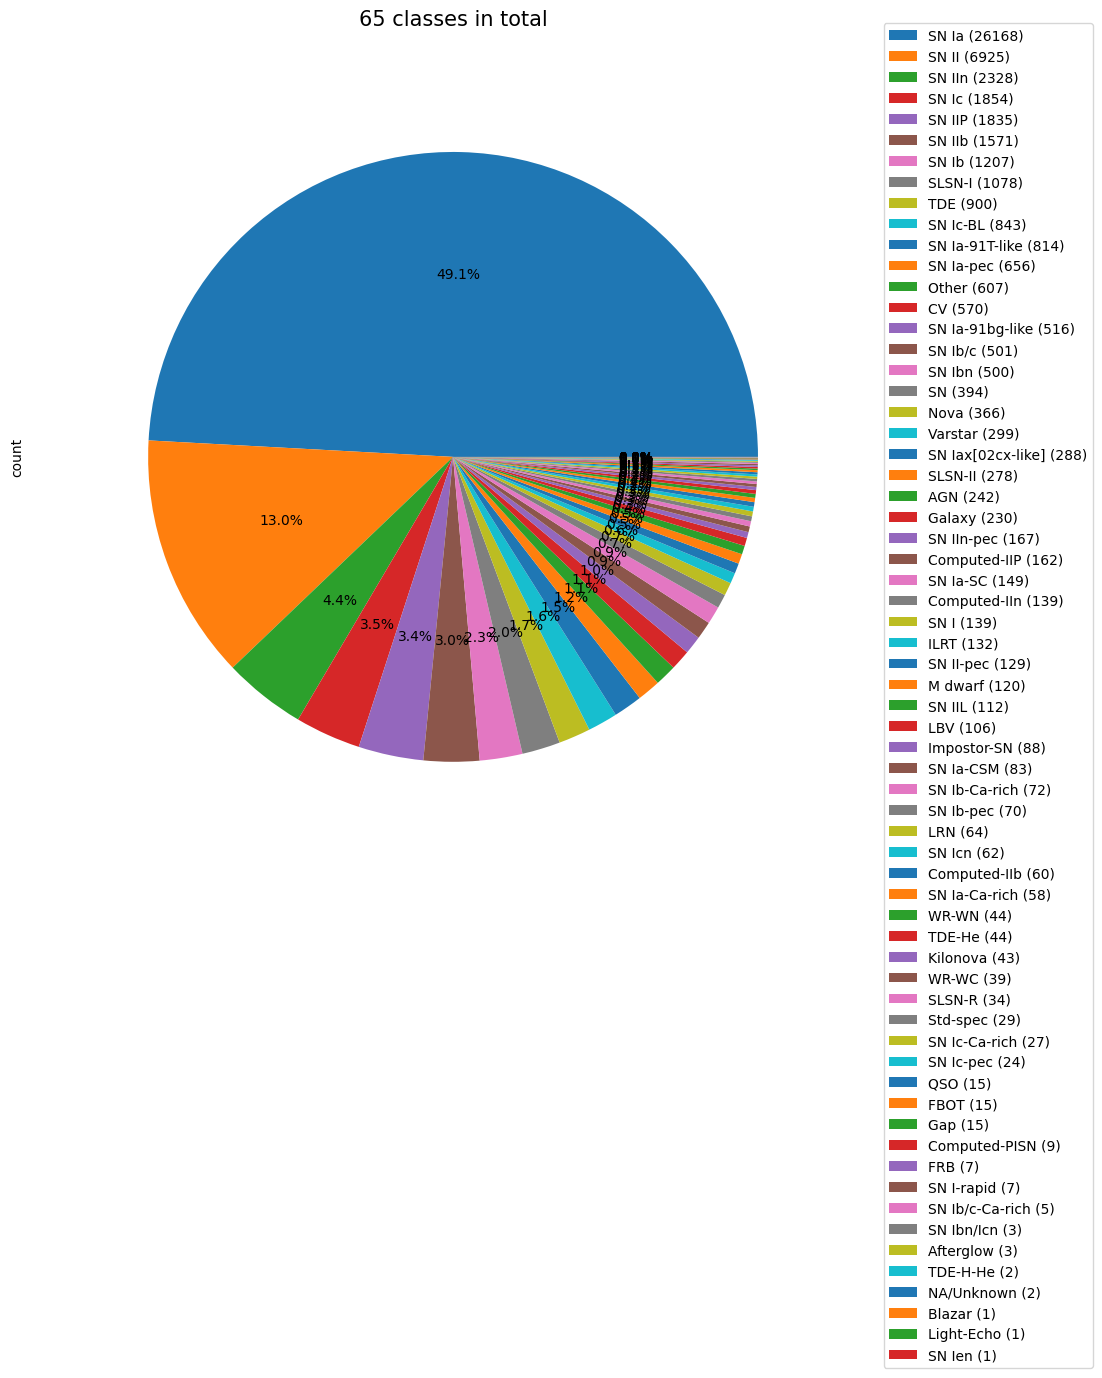

In [14]:
# Get unique object types and their counts
obj_type_counts = spectra_info["Obj_Type"].value_counts()

# Plot pie chart
ax = obj_type_counts.plot.pie(
    figsize=(11, 11), labeldistance=None, autopct="%1.1f%%", radius=0.9
)

# Construct legend labels with counts
legend_labels = [
    f"{obj_type} ({count})"
    for obj_type, count in zip(obj_type_counts.index, obj_type_counts)
]

# Add legend
ax.legend(legend_labels, bbox_to_anchor=(1, 1.02), loc="upper left")

# Set title
ax.set_title(
    "%s classes in total" % (str(len(set(spectra_info["Obj_Type"])))), fontsize=15
)

plt.show()

### General classes:

*Remove Computed-Ia.

| Main class    | Content | Num|
| -------- | ------- | ------- |
| SN Ia  |  SN Ia, SN Ia-91T-like, SN Ia-91bg-like, SN Ia-CSM,  SN Ia-Ca-rich,  SN Ia-SC, SN Ia-pec, SN Iax-02cx-like| 8 |
| SN II  | SN II, SN II-pec, SN IIL, SN IIP |4|
| Stripped Envelop SN | SN Ib, SN Ib-Ca-rich, SN Ib-pec, SN Ib/c, SN Ibn, SN Ibn/Icn, SN Ic, SN Ic-BL, SN Ic-Ca-rich, SN Ic-pec, SN Icn, SN IIb, SN I| 12 |
| Interacting SN|  SN IIn, SN IIn-pec, SLSN-II | 3|
| SLSN | SLSN-I | 1 |
| TDE |TDE, TDE-H-He| 2 |
| Other |  SN, Gap, FBOT| 3 |
| Non-SN | Varstar, CV, Nova, QSO, AGN, M dwarf, LBV, LRN, ILRT, Galaxy, afterglow, Impostor-SN, -- | 13 |
| Total || 47|



In [25]:
big_class = {}

big_class["SN Ia"] = [
    "SN Ia",
    "SN Ia-91T-like",
    "SN Ia-91bg-like",
    "SN Ia-CSM",
    "SN Ia-Ca-rich",
    "SN Ia-SC",
    "SN Ia-pec",
    "SN Iax[02cx-like]",
]
big_class["SN II"] = [
    "SN II",
    "SN II-pec",
    "SN IIL",
    "SN IIP",
    "Computed-IIP",
]
big_class["Stripped Envelop SN"] = [
    "SN I",
    "SN Ib",
    "SN Ib-Ca-rich",
    "SN Ib-pec",
    "SN Ib/c",
    "SN Ib/c-Ca-rich",
    "SN Ibn",
    "SN Ibn/Icn",
    "SN Ic",
    "SN Ic-BL",
    "SN Ic-Ca-rich",
    "SN Ic-pec",
    "SN Icn",
    "SN Ien",
    "SN IIb",
    "Computed-IIb",
    "SN I-rapid",
]
big_class["Interacting SN"] = [
    "SN IIn",
    "SN IIn-pec",
    "SLSN-II",
    "Computed-IIn",
]
big_class["SLSN"] = [
    "SLSN-I",
    "SLSN-R",
]
big_class["TDE"] = [
    "TDE",
    "TDE-H-He",
    "TDE-He",
]
big_class["Other"] = [
    "SN",
    "Gap",
    "FBOT",
    "Computed-PISN",
    "Kilonova",
    "Light-Echo",
]
big_class["Non-SN"] = [
    "Varstar",
    "CV",
    "Nova",
    "QSO",
    "AGN",
    "Blazar",
    "M dwarf",
    "LBV",
    "LRN",
    "ILRT",
    "Galaxy",
    "Afterglow",
    "Impostor-SN",
    "WR-WC",
    "WR-WN",
    "FRB",
    "Std-spec",
]
big_class["Unknown/NA"] = ["NA/Unknown", "nan", "--", "Other", np.nan]

In [26]:
# check if any class is missed.
class_values = []
for i in big_class.values():
    class_values = class_values + i
for i in set(spectra_info["Obj_Type"]):
    if i not in class_values:
        print(i)

reversed_class = {}
for k, v in zip(big_class.keys(), big_class.values()):
    for i in v:
        reversed_class[i] = k

In [27]:
spectra_info["big_class"] = spectra_info["Obj_Type"]
spectra_info["big_class"] = spectra_info["big_class"].map(reversed_class)
spectra_info

/var/folders/2d/ht34x6mn7hx9d1sv4g_j8nfr0000gn/T/ipykernel_73699/876661355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra_info["big_class"] = spectra_info["Obj_Type"]
/var/folders/2d/ht34x6mn7hx9d1sv4g_j8nfr0000gn/T/ipykernel_73699/876661355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra_info["big_class"] = spectra_info["big_class"].map(reversed_class)


,IAU_name,Internal_names,Obj_RA,Obj_DEC,Obj_Type,Redshift,Spec_ID,Obs_date,JD,Phase_(days),...,Blaze,Lambda_min,Lambda_max,Del_Lambda,Contrib,Publish,Remarks,Created_by,Creation_date,big_class
0,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10912,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,3300.000000,5399.000000,0.999524,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18,SN II
1,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10913,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,5100.000000,10499.000000,0.999815,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18,SN II
2,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10932,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,3300.000000,10500.000000,1.999445,Shivvers et al. 2017,2017PASP..129e4201S,"[Data obtained from:Shivvers, I.] [Prev. spec ...",Migration From WISeREP1.0,2011-07-21 07:54:18,SN II
3,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,49488,2000-03-15 00:00:00.00,2.451618e+06,NaN,...,NaN,3300.000000,10500.000000,1.999445,NaN,2002AJ....124.2490L,SNR: 22.188;,WIS_Bot1,2019-01-23 10:48:35,SN II
4,SN 1999gi,NaN,154.569420,41.44117,SN IIP,0.001961,10914,2000-03-25 00:00:00.00,2.451628e+06,NaN,...,NaN,4380.000000,6839.000000,0.999593,Leonard et al. 2002,2002AJ....124.2490L,Please note that the spectrum may have been er...,Migration From WISeREP1.0,2011-07-21 07:54:18,SN II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54000,NaN,ZTF21aceuvhb,15.794479,3.07434,M dwarf,NaN,63947,2021-10-14 02:06:50.00,2.459502e+06,NaN,...,NaN,3651.048340,9246.227457,5.512492,NaN,NaN,NaN,WIS_Bot1,2021-10-14 11:33:34,Non-SN
54001,NaN,ZTF22abgucbp,57.463603,-7.37529,AGN,0.382000,67804,2022-10-14 08:07:14.00,2.459867e+06,NaN,...,NaN,3673.047852,9268.227452,5.512492,NaN,NaN,NaN,WIS_Bot1,2022-10-14 11:26:57,Non-SN
54002,NaN,ZTF20abodaps,359.810211,-17.69645,AGN,0.610000,78514,2023-10-04 06:26:57.00,2.460222e+06,NaN,...,NaN,3671.381836,9267.085081,5.513008,NaN,NaN,NaN,WIS_Bot1,2023-10-04 13:16:26,Non-SN
54003,NaN,N0E8005418,315.551786,0.21671,Galaxy,0.191000,78971,2023-11-05 00:50:44.00,2.460254e+06,NaN,...,NaN,3672.381836,9268.085081,5.513008,NaN,NaN,NaN,WIS_Bot1,2023-11-05 13:01:33,Non-SN


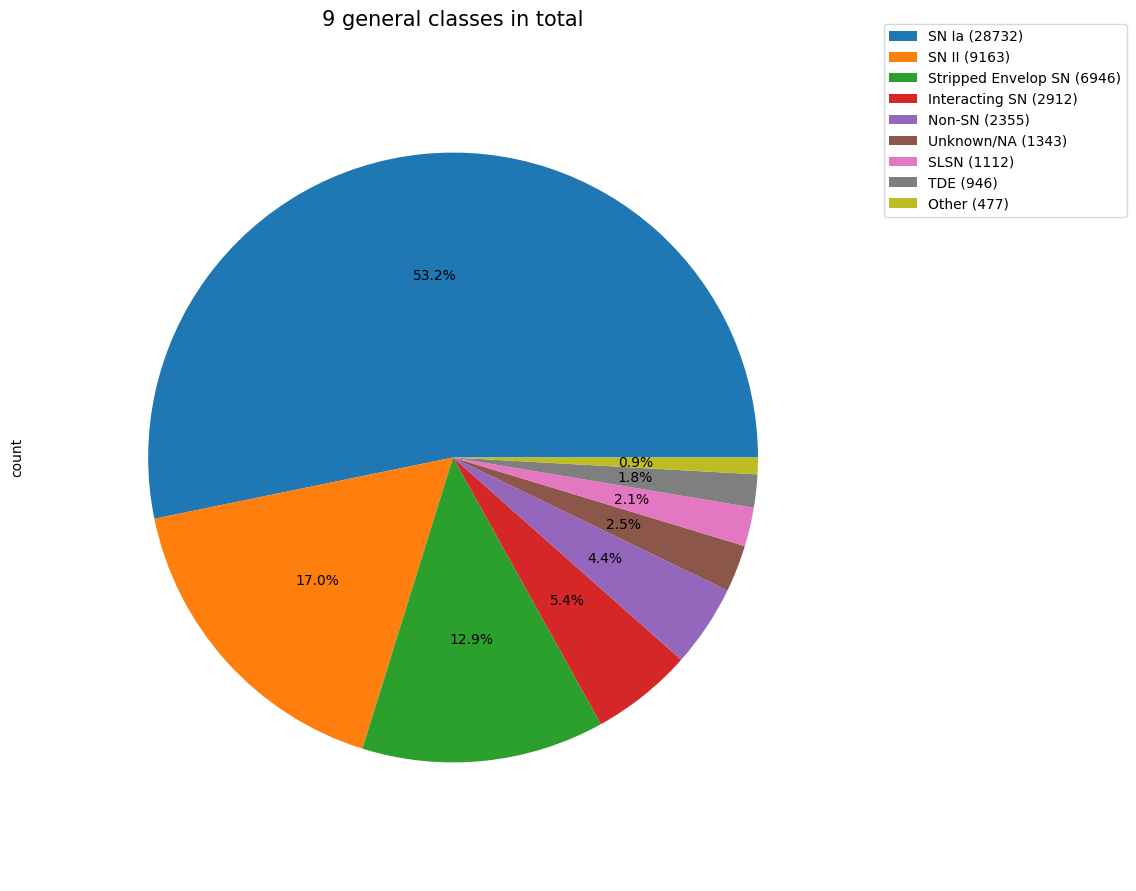

In [28]:
# Get unique object types and their counts
obj_type_counts = spectra_info["big_class"].value_counts()

# Plot pie chart
ax = obj_type_counts.plot.pie(
    figsize=(11, 11), labeldistance=None, autopct="%1.1f%%", radius=0.9
)

# Construct legend labels with counts
legend_labels = [
    f"{obj_type} ({count})"
    for obj_type, count in zip(obj_type_counts.index, obj_type_counts)
]

# Add legend
ax.legend(legend_labels, bbox_to_anchor=(1, 1.02), loc="upper left")

# Set title
ax.set_title(
    "%s general classes in total" % (str(len(set(spectra_info["big_class"])))),
    fontsize=15,
)

plt.show()

### 2. Redshift distribution
The redshift distribution among the dataset/class.

(Even we don't consider the redshift, it could be helpful to estimate the performance later. :) )

Redshift distribution among big classes.

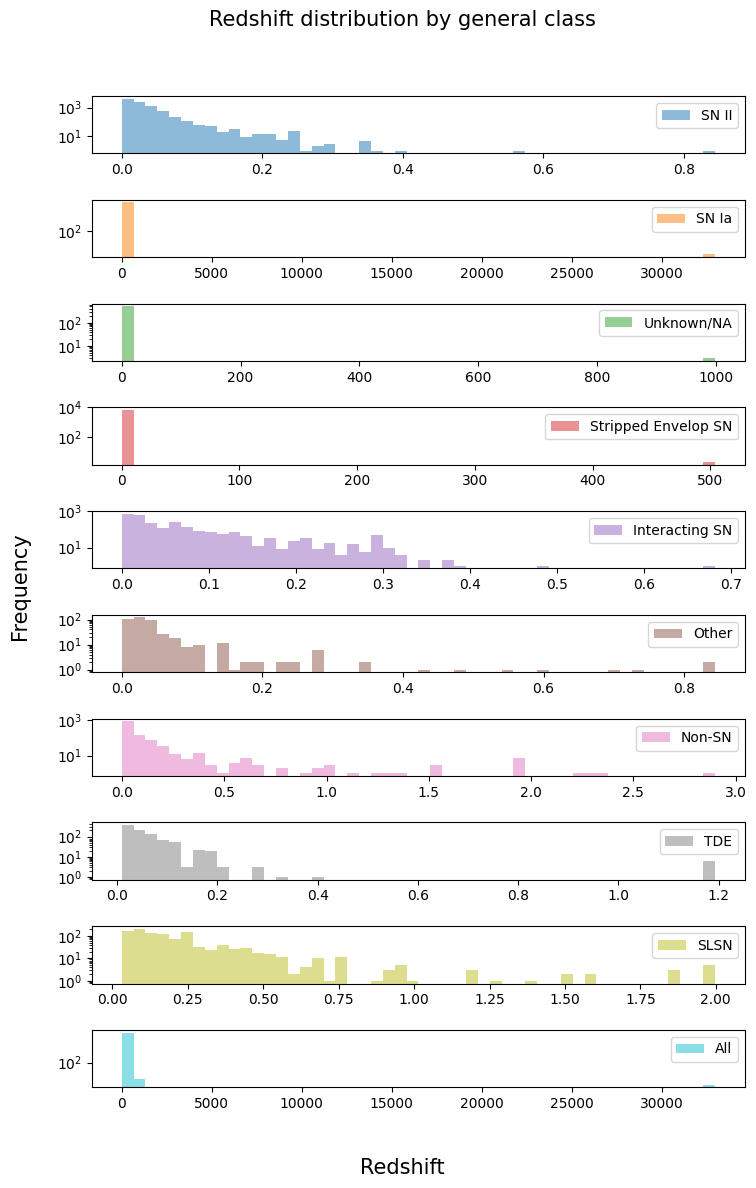

In [37]:
# Get unique labels
unique_labels = spectra_info["big_class"].unique()

# Plotting histograms by label
fig, axs = plt.subplots(
    len(unique_labels) + 1, figsize=(8, 12), sharex=False, sharey=False
)

# Define colors for each label
colors = plt.cm.tab10.colors[: len(unique_labels) + 1]

for i, (label, color) in enumerate(zip(unique_labels, colors)):
    ax = axs[i] if len(unique_labels) > 1 else axs
    spectra_info[spectra_info["big_class"] == label]["Redshift"].plot(
        kind="hist", ax=ax, alpha=0.5, bins=50, label=label, color=color
    )
    ax.legend()
    ax.set_yscale("log")
    ax.set_ylabel("")

ax = axs[-1]
spectra_info["Redshift"].plot(
    kind="hist", ax=ax, alpha=0.5, bins=50, label="All", color=colors[-1]
)
ax.legend()
ax.set_yscale("log")
ax.set_ylabel("")

# Adding labels and title
fig.text(0.5, 0.01, "Redshift", ha="center", fontsize=15)
fig.text(0.01, 0.5, "Frequency", va="center", rotation="vertical", fontsize=15)
plt.suptitle("Redshift distribution by general class", fontsize=15)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
# plt.tight_layout()
plt.show()

### 3.  Spectra resolution/instrument summary
Spectra resolution/instrument distribution.

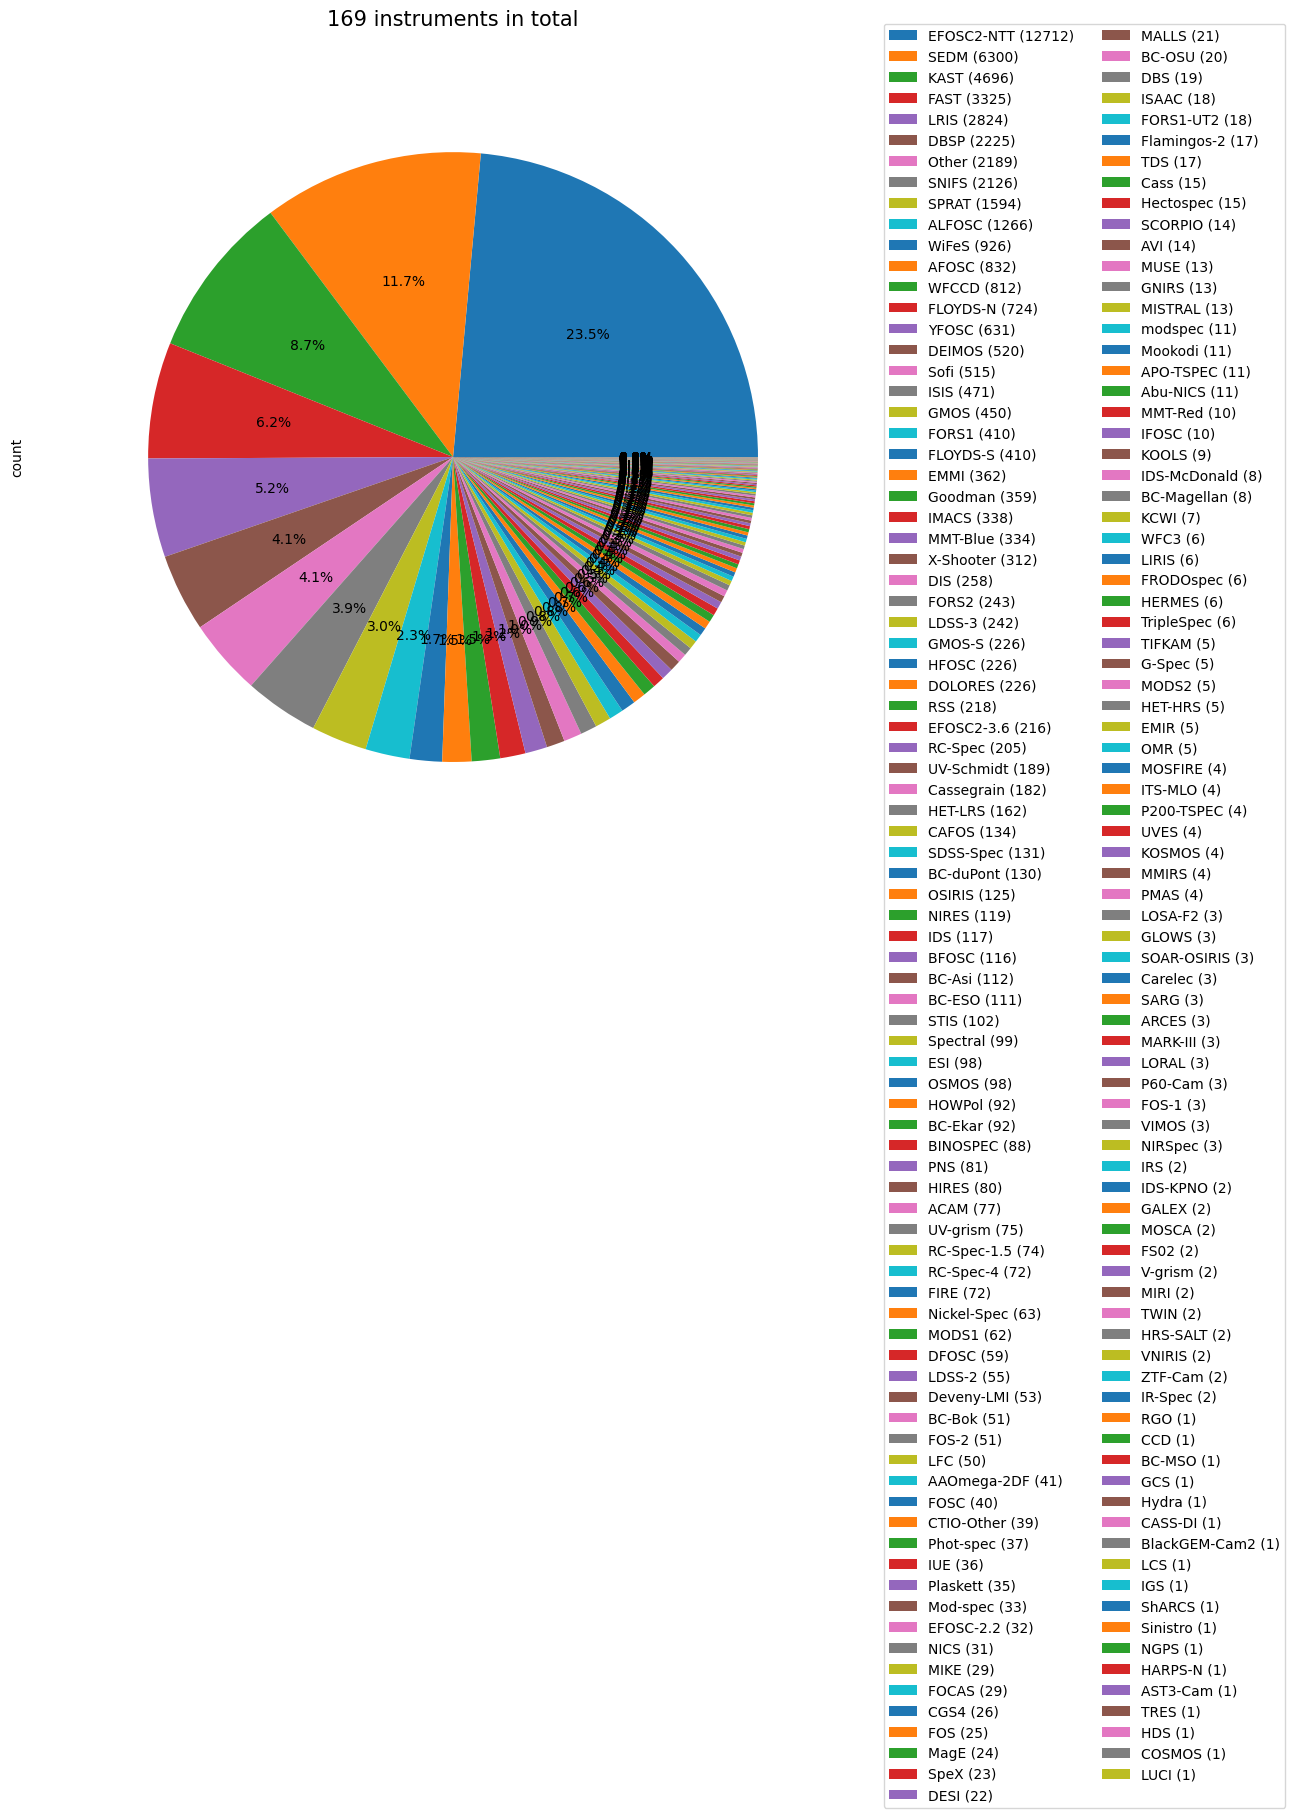

In [38]:
# Get unique instruments and their counts
instrument_counts = spectra_info["Instrument"].value_counts()

# Plot pie chart
ax = instrument_counts.plot.pie(
    figsize=(11, 11), labeldistance=None, autopct="%1.1f%%", radius=0.9
)

# Construct legend labels with counts
legend_labels = [
    f"{instrument} ({count})"
    for instrument, count in zip(instrument_counts.index, instrument_counts)
]

# Add legend with two columns
ax.legend(legend_labels, bbox_to_anchor=(1, 1.02), loc="upper left", ncol=2)

# Set title
ax.set_title(
    "%s instruments in total" % (str(len(set(spectra_info["Instrument"])))), fontsize=15
)

plt.show()

For each big class, how the intruments are distributed? This might be helpful for the potential bias of performance analysis.

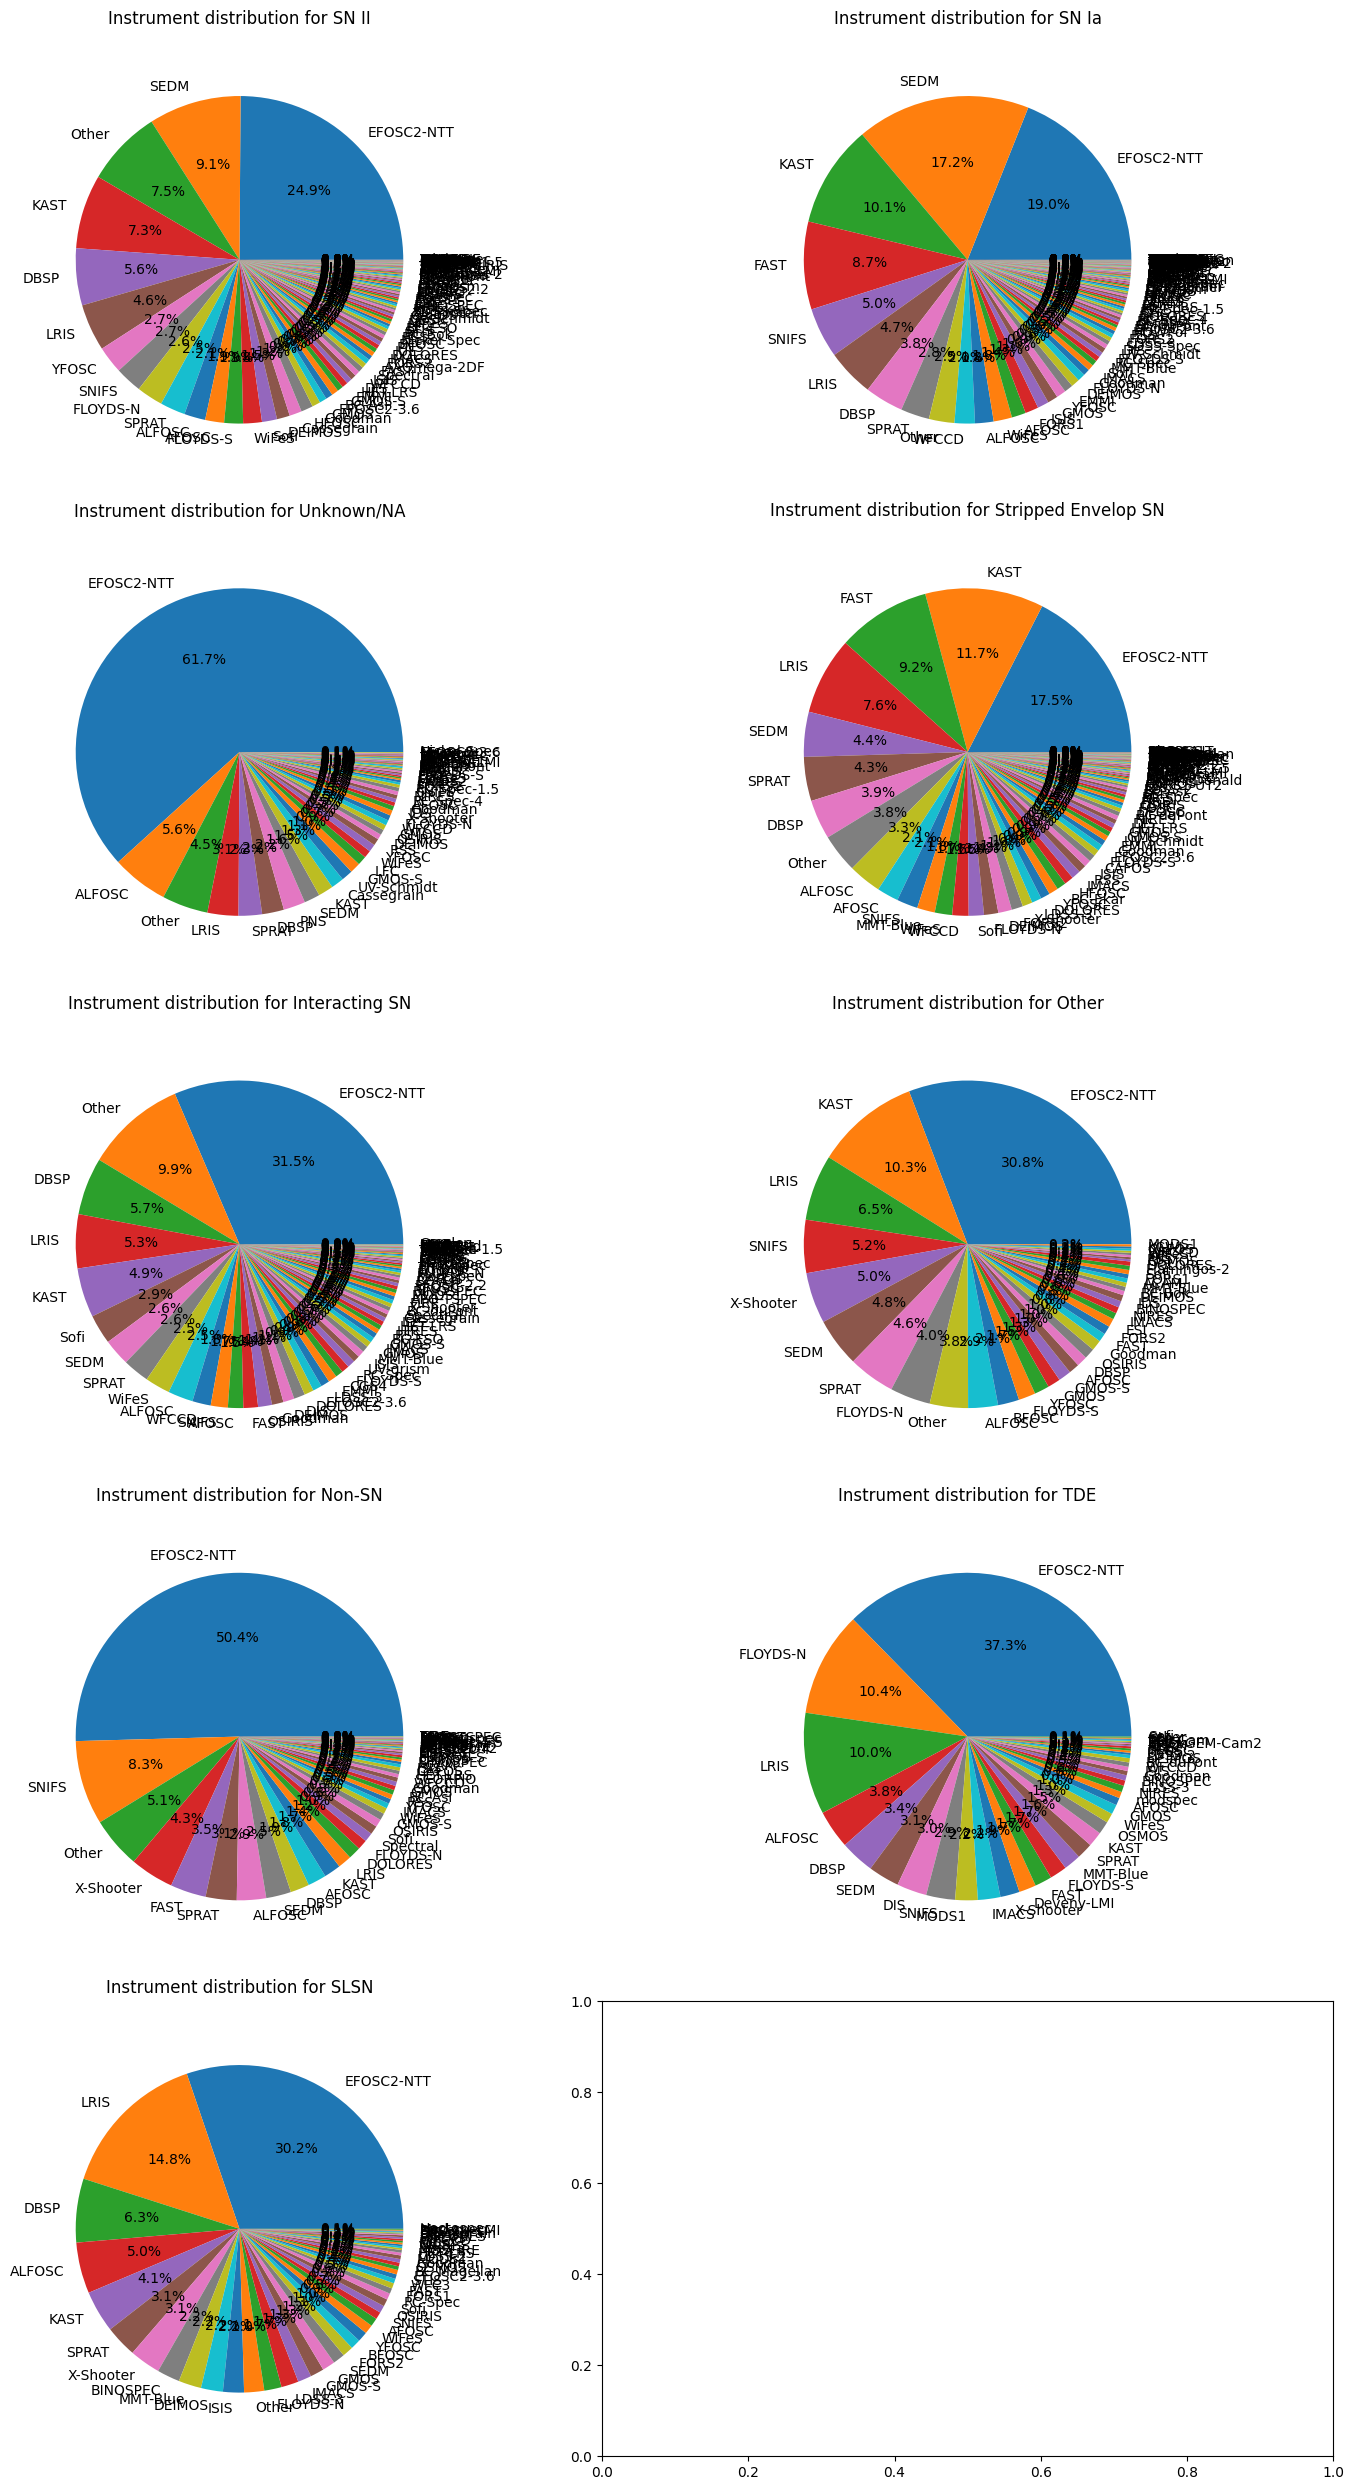

In [39]:
# Get unique object types
unique_obj_types = spectra_info["big_class"].unique()

# Calculate the number of rows and columns for subplots
num_plots = len(unique_obj_types)
num_cols = 2  # You may adjust this according to your preference
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Empty lists to accumulate legend handles
legend_handles = []

# Iterate over each Obj_Type and plot instrument distribution
for i, obj_type in enumerate(unique_obj_types):
    # Filter DataFrame for the current Obj_Type
    obj_type_df = spectra_info[spectra_info["big_class"] == obj_type]

    # Group by Instrument and calculate counts
    instrument_counts = obj_type_df["Instrument"].value_counts()

    # Plot pie chart
    ax = axes[i // num_cols, i % num_cols] if num_plots > 1 else axes
    pie = instrument_counts.plot.pie(ax=ax, autopct="%1.1f%%", radius=0.9)
    ax.set_title(f"Instrument distribution for {obj_type}")
    ax.set_ylabel("")  # Remove y-labels

    # Accumulate legend handles
    for label in instrument_counts.index:
        if label not in legend_handles:
            legend_handles.append(
                pie.patches[0]
            )  # Assuming all pies have the same number of patches

# Create legend with custom handles and labels
legend_labels = spectra_info["Instrument"].unique()
# fig.legend(legend_handles, legend_labels, loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

### *P.S. I would like to remove some low number instrument samples, but also think their R and wavelength range might be similar to those with high frequencies, so leave it there to next stage.*

### 4. Spectra dispersion, length, and wavelength range.
A heatmap of spectra length and wavelength range could be helpful.

### Read the data

In [17]:
data = np.load("all_TNS_spectra/all_spectra.npy", allow_pickle=True).item()
spectra_names = list(data.keys())
for i in spectra_names:
    c1 = str(i).strip("all_TNS_spectra/data_spectra/")
    data[c1] = data.pop(i)  # .strip('_TNS*')
spectra_names = list(data.keys())
# spectra_names

FileNotFoundError: [Errno 2] No such file or directory: 'all_TNS_spectra/all_spectra.npy'

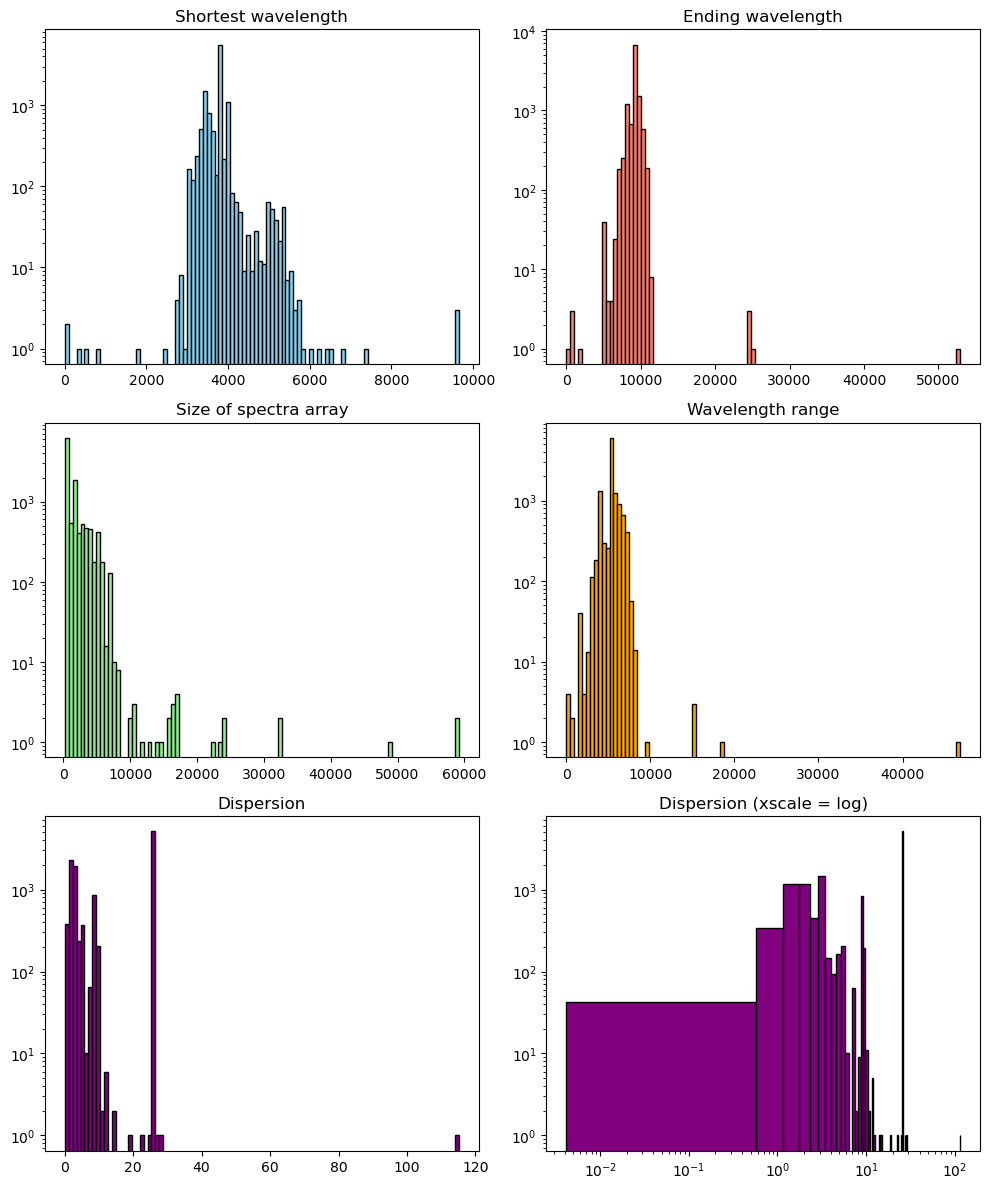

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Plot histograms in each subplot
shortest_ws = [np.min(data[x]["w"]) for x in data.keys()]
axs[0, 0].hist(shortest_ws, bins=100, color="skyblue", edgecolor="black")
axs[0, 0].set_title("Shortest wavelength")
axs[0, 0].set_yscale("log")

longest_ws = [np.max(data[x]["w"]) for x in data.keys()]
axs[0, 1].hist(longest_ws, bins=100, color="salmon", edgecolor="black")
axs[0, 1].set_title("Ending wavelength")
axs[0, 1].set_yscale("log")

size_ws = [data[x]["w"].size for x in data.keys()]
axs[1, 0].hist(size_ws, bins=100, color="lightgreen", edgecolor="black")
axs[1, 0].set_title("Size of spectra array")
axs[1, 0].set_yscale("log")

cover_ws = [(np.max(data[x]["w"]) - np.min(data[x]["w"])) for x in data.keys()]
axs[1, 1].hist(cover_ws, bins=100, color="orange", edgecolor="black")
axs[1, 1].set_title("Wavelength range")
axs[1, 1].set_yscale("log")

dispersion_ws = [
    (np.max(data[x]["w"]) - np.min(data[x]["w"])) / data[x]["w"].size
    for x in data.keys()
]
axs[2, 0].hist(dispersion_ws, bins=100, color="purple", edgecolor="black")
axs[2, 0].set_title("Dispersion")
axs[2, 0].set_yscale("log")

# Hide the empty subplot
dispersion_ws = [
    (np.max(data[x]["w"]) - np.min(data[x]["w"])) / data[x]["w"].size
    for x in data.keys()
]
axs[2, 1].hist(dispersion_ws, bins=200, color="purple", edgecolor="black")
axs[2, 1].set_title("Dispersion (xscale = log)")
axs[2, 1].set_yscale("log")
axs[2, 1].set_xscale("log")


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
print(
    "The min, mean, median of dispersion are %f, %f and %f.\n"
    % (np.min(dispersion_ws), np.mean(dispersion_ws), np.median(dispersion_ws))
)

The min, mean, median of dispersion are 0.004141, 13.368237 and 9.178753.



At this stage, do some cuts for the heatmap plot. (might be helpful for preprocessing part...?)
1. Ending wavelength < 20000
2. Starting wavelngth > 2000 and < 6000
3. Size of array < 20000 and > 1000
4. Coverage length < 10000
5. dispersion < 30
<!-- 6. Minimal dispersion for plotting == 1 -->


In [46]:
plot_data = {}
for x in data.keys():
    if (
        np.max(data[x]["w"]) < 20000
        and np.min(data[x]["w"]) < 6000
        and np.min(data[x]["w"]) > 2000
        and data[x]["w"].size < 20000
        and np.max(data[x]["w"]) - np.min(data[x]["w"]) < 10000
        and np.max(data[x]["w"]) - np.min(data[x]["w"]) > 1000
        and (np.max(data[x]["w"]) - np.min(data[x]["w"])) / data[x]["w"].size < 30
    ):
        plot_data[x] = data[x]["w"]

print(
    "%d samples are left, %d are removed.\n"
    % (len(plot_data.keys()), len(data.keys()) - len(plot_data.keys()))
)

11447 samples are left, 22 are removed.



In [47]:
import re

file_names = (
    spectra_info["Ascii_file"]
    .apply(lambda x: "_".join([x[2:].split("_")[0], x[2:].split("_")[1]]))
    .values
)
file_names

array(['2023gkb_2023-05-19', '2023gjt_2023-05-09', '2023gjg_2023-04-23',
       ..., '2023bfq_2023-02-10', '2023bfb_2023-02-02',
       '2023bfa_2023-02-12'], dtype=object)

In [48]:
# match big class
big_class_obj_dict = {}
missing_obj = []
for x in plot_data.keys():
    x1 = "_".join([x.split("_")[0], x.split("_")[1]])
    x2 = "_".join([x.split("_")[0], x.split("_")[1]])[2:]
    if x1 in file_names:
        idx = np.where(file_names == x1)
        big_class_obj_dict[x] = spectra_info["big_class"].values[idx][0]
    elif x2 in file_names:
        idx = np.where(file_names == x2)
        big_class_obj_dict[x] = spectra_info["big_class"].values[idx][0]
    else:
        print("%s no found.\n" % (x))
        missing_obj.append(x)

for m in missing_obj:
    plot_data.pop(m)
len(big_class_obj_dict.keys())

AT2023com_2023-02-27_00-53-45_NOT_ALFOSC no found.

2023com_2023-03-29_05-40-12_P60_SEDM no found.

AT2023wuk_2023-11-07_22-57-19_NOT_ALFOSC_TNS.tx no found.



11444

The missing files are Computed-Ia.

In [60]:
# create a new df

sns_data = []
for x in plot_data.keys():
    obj_dict = {
        "spectra_name": x,
        "shortest_wavelength": "{:.1f}".format(np.min(plot_data[x])),
        "wavelength_range": "{:.1f}".format(
            np.max(plot_data[x]) - np.min(plot_data[x])
        ),
        "size": plot_data[x].size,
        "dispersion": "{:.3f}".format(
            (np.max(plot_data[x]) - np.min(plot_data[x])) / plot_data[x].size
        ),
        "class": big_class_obj_dict[x],
    }
    sns_data.append(obj_dict)
sns_df = pd.DataFrame(sns_data)

sns_df = sns_df.apply(pd.to_numeric, errors="ignore")
sns_df

,spectra_name,shortest_wavelength,wavelength_range,size,dispersion,class
0,2022io_2022-01-11_00-09-00_Ekar_AFOSC,3407.3,4797.9,1023,4.690,SN Ia
1,2023ung_2023-10-10_20-32-00_Other_Oth,4005.5,3991.6,424,9.414,SN Ia
2,2019qj_2019-01-13_02-55-14_UH88_SNIF,3305.1,6392.0,3197,1.999,SN Ia
3,2022bqt_2022-02-10_05-43-26_UH88_SNIF,3402.9,5697.0,1900,2.998,Stripped Envelop SN
4,2019rx_2019-01-15_21-36-00_Ekar_AFOSC,3398.6,4797.9,1023,4.690,SN Ia
...,...,...,...,...,...,...
11439,AT2023ufj_2023-10-12_17-43-50_Other_Oth,3898.9,3492.0,3493,1.000,Non-SN
11440,AT2023ypg_2023-12-02_15-34-03_Other_Oth,3726.1,3675.0,3602,1.020,Non-SN
11441,AT2023tmh_2023-09-27_20-01-42_Other_Oth,3755.4,3598.0,3599,1.000,Non-SN
11442,AT2024amp_2024-01-19_20-36-04_Other_Oth,3803.8,3594.5,415,8.661,Non-SN


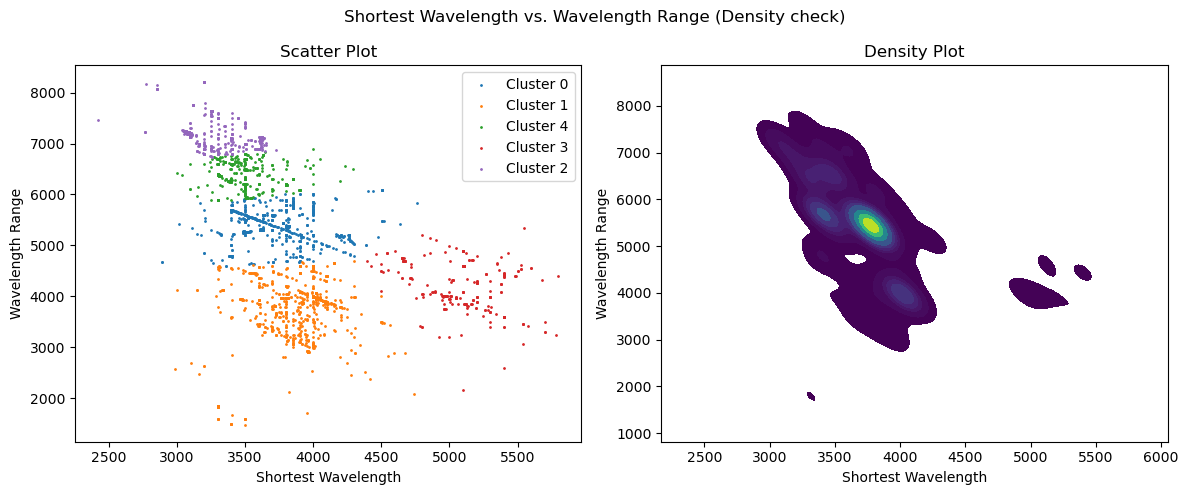

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original scatter plot on the first subplot
# Fit KMeans clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters
sns_df["cluster"] = kmeans.fit_predict(
    sns_df[["shortest_wavelength", "wavelength_range"]]
)

# Get unique cluster labels
unique_clusters = sns_df["cluster"].unique()

# Plot each cluster separately
for cluster_label in unique_clusters:
    cluster_data = sns_df[sns_df["cluster"] == cluster_label]
    axes[0].scatter(
        cluster_data["shortest_wavelength"],
        cluster_data["wavelength_range"],
        label=f"Cluster {cluster_label}",
        s=1,
    )


# axes[0].scatter(df_result['starting_w'], df_result['length'], color='gray', s=1)
axes[0].set_xlabel("Shortest Wavelength")
axes[0].set_ylabel("Wavelength Range")
axes[0].set_title("Scatter Plot")
axes[0].legend()

# KDE plot on the second subplot
sns.kdeplot(
    data=sns_df,
    x="shortest_wavelength",
    y="wavelength_range",
    cmap="viridis",
    fill=True,
    bw_adjust=1.2,
    ax=axes[1],
)
axes[1].set_xlabel("Shortest Wavelength")
axes[1].set_ylabel("Wavelength Range")
axes[1].set_title("Density Plot")

# Add a title for the entire figure
fig.suptitle("Shortest Wavelength vs. Wavelength Range (Density check)")


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

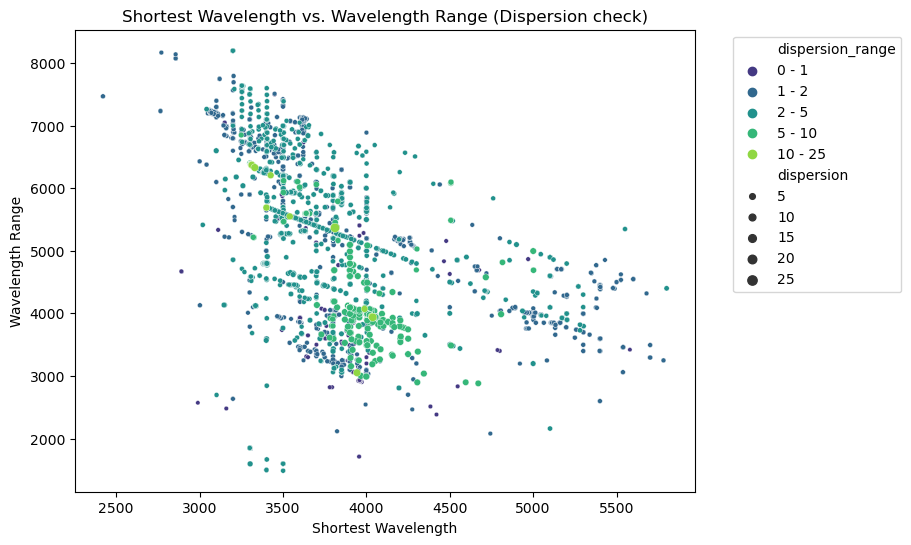

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns_df = sns_df.sort_values("dispersion")
# Define dispersion ranges and corresponding colors
dispersion_ranges = [(0, 1), (1, 2), (2, 5), (5, 10), (10, 25)]
colors = sns.color_palette("viridis", n_colors=len(dispersion_ranges))


# Function to assign dispersion range category
def get_dispersion_range_category(dispersion):
    for i, (start, end) in enumerate(dispersion_ranges):
        if start <= dispersion <= end:
            return f"{start} - {end}"


# Add a new column with dispersion range category
sns_df["dispersion_range"] = sns_df["dispersion"].apply(get_dispersion_range_category)

# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Scatter plot with dispersion ranges as colors
scatter = sns.scatterplot(
    data=sns_df,
    x="shortest_wavelength",
    y="wavelength_range",
    hue="dispersion_range",
    palette=colors,
    size="dispersion",
    sizes=(10, 50),
    alpha=1,
)

# Set labels and title
plt.xlabel("Shortest Wavelength")
plt.ylabel("Wavelength Range")
plt.title("Shortest Wavelength vs. Wavelength Range (Dispersion check)")

# Adjust legend
scatter.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

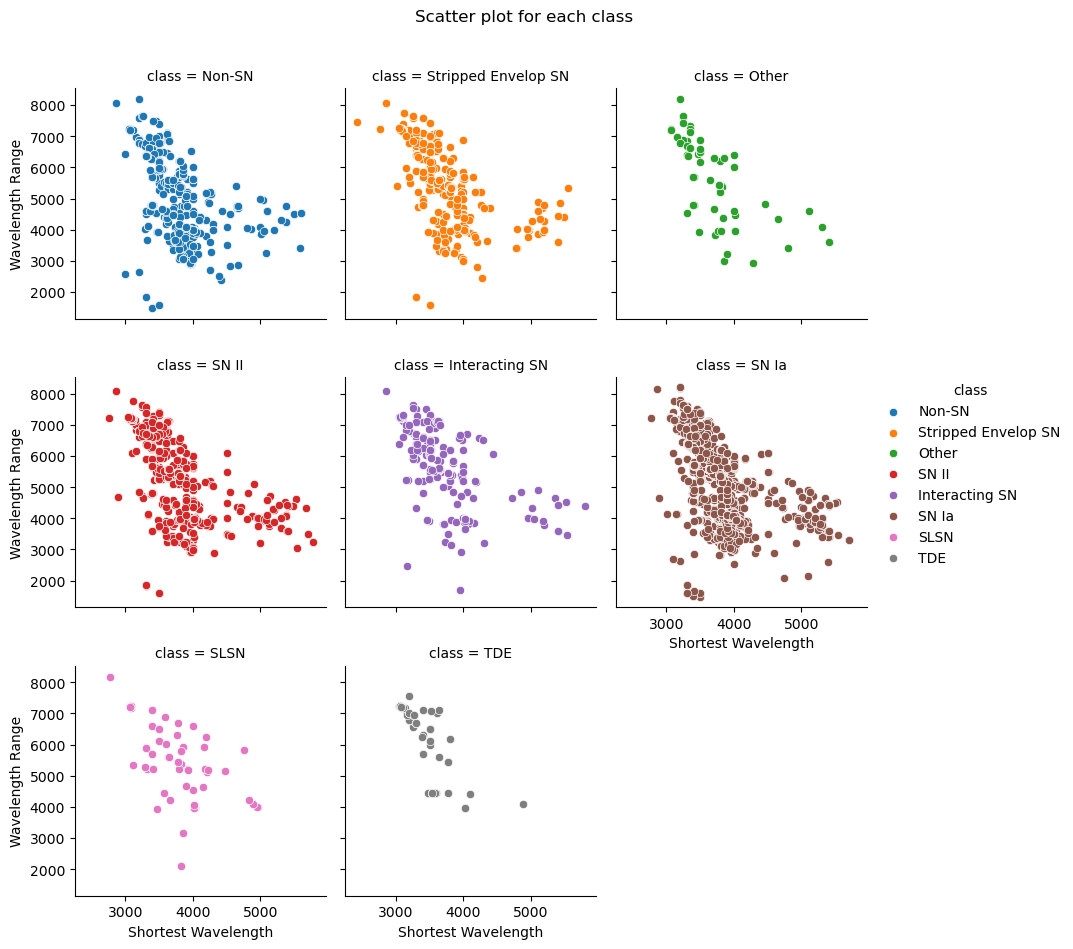

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid with a scatter plot for each class
g = sns.FacetGrid(sns_df, col="class", hue="class", col_wrap=3)
g.map(sns.scatterplot, "shortest_wavelength", "wavelength_range")

# Set labels and title
g.set_axis_labels("Shortest Wavelength", "Wavelength Range")
g.fig.suptitle("Scatter plot for each class", y=1.05)

# Add legend
g.add_legend()

# Show plot
plt.show()

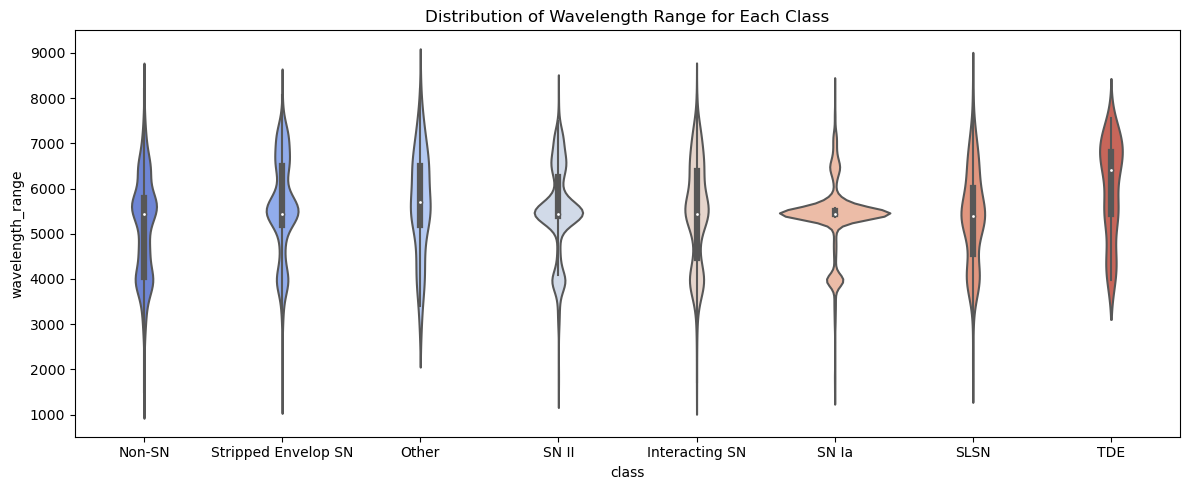

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with the specified size
plt.figure(figsize=(12, 5))

# Create violin plot: length vs. class
sns.violinplot(data=sns_df, x="class", y="wavelength_range", palette="coolwarm")

# Set the title of the plot
plt.title("Distribution of Wavelength Range for Each Class")

# Adjust layout to ensure no overlap
plt.tight_layout()

# Display the plot
plt.show()

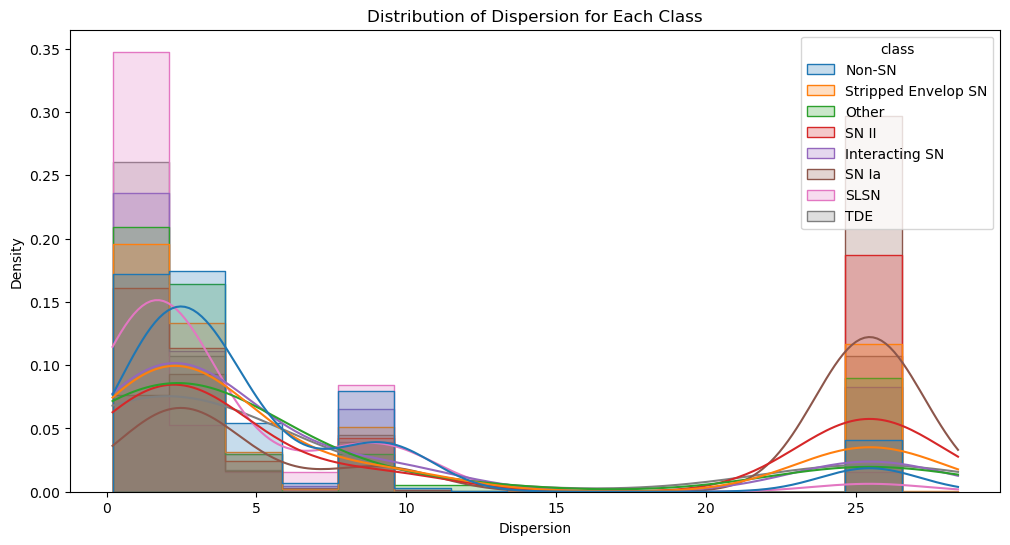

In [67]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)

# Create a histogram plot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=sns_df,
    x="dispersion",
    hue="class",
    kde=True,
    element="step",
    stat="density",
    common_norm=False,
)

# Customize the plot
plt.title("Distribution of Dispersion for Each Class")
plt.xlabel("Dispersion")
plt.ylabel("Density")

# Show the plot
plt.show()